In [3]:
import kagglehub
import pandas as pd
path = kagglehub.dataset_download("fedesoriano/company-bankruptcy-prediction")
data = pd.read_csv(path+"/data.csv")

/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 4.63M/4.63M [00:00<00:00, 53.1MB/s]

Extracting files...


In [4]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


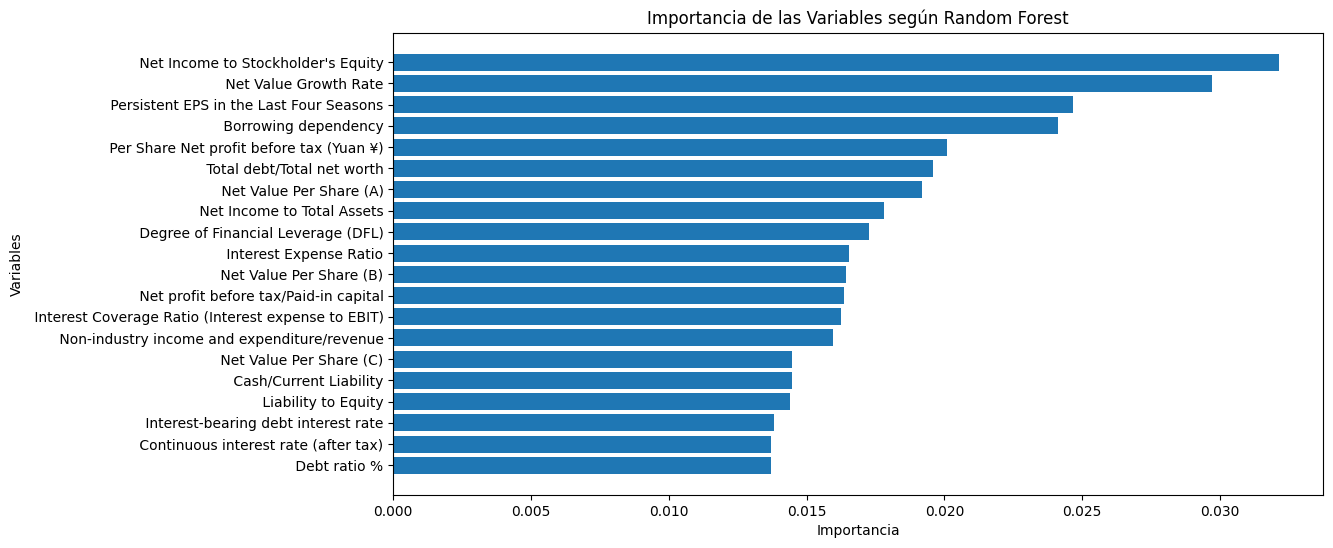

In [6]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Separar variables predictoras y objetivo
X = data.drop(columns=["Bankrupt?"])  # Variables predictoras
y = data["Bankrupt?"]  # Variable objetivo (clasificación)

# Modelo de Random Forest para clasificación
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X, y)

# Obtener importancia de variables
importancias = modelo.feature_importances_

# Crear DataFrame con los resultados
feature_importance_df = pd.DataFrame({"Variable": X.columns, "Importancia": importancias})
feature_importance_df = feature_importance_df.sort_values(by="Importancia", ascending=False)

# Graficar las 20 variables más importantes
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df["Variable"][:20], feature_importance_df["Importancia"][:20])
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.title("Importancia de las Variables según Random Forest")
plt.gca().invert_yaxis()
plt.show()


In [15]:
feature_importance_df["Variable"][:20]
# Obtener solo los nombres de las variables (índice)
nombres_top_20_variables = feature_importance_df["Variable"][:20].tolist()

print("Nombres de las 20 variables más importantes:")
print(nombres_top_20_variables)


Nombres de las 20 variables más importantes:
[" Net Income to Stockholder's Equity", ' Net Value Growth Rate', ' Persistent EPS in the Last Four Seasons', ' Borrowing dependency', ' Per Share Net profit before tax (Yuan ¥)', ' Total debt/Total net worth', ' Net Value Per Share (A)', ' Net Income to Total Assets', ' Degree of Financial Leverage (DFL)', ' Interest Expense Ratio', ' Net Value Per Share (B)', ' Net profit before tax/Paid-in capital', ' Interest Coverage Ratio (Interest expense to EBIT)', ' Non-industry income and expenditure/revenue', ' Net Value Per Share (C)', ' Cash/Current Liability', ' Liability to Equity', ' Interest-bearing debt interest rate', ' Continuous interest rate (after tax)', ' Debt ratio %']


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calcular matriz de correlación
corr_matrix = data.corr(method='pearson')  # También puedes usar 'spearman' o 'kendall'
target_corr = corr_matrix['Bankrupt?'].sort_values(ascending=False)

# Eliminar la autocorrelación de la variable consigo misma
target_corr = target_corr.drop('Bankrupt?')

In [17]:
umbral = 0.15  # Puedes ajustar este valor según tu criterio
variables_determinantes_15 = target_corr[abs(target_corr) > umbral]

# Crear una lista vacía y agregar los nombres de las variables a ella
nombres_variables_determinantes = []

# Agregar los nombres a la lista
for variable in variables_determinantes_15.index:
    nombres_variables_determinantes.append(variable)

print("Nombres de las variables más determinantes:")
print(nombres_variables_determinantes)


Nombres de las variables más determinantes:
[' Debt ratio %', ' Current Liability to Assets', ' Borrowing dependency', ' Current Liability to Current Assets', ' Liability to Equity', ' Current Liabilities/Equity', ' Current Liability to Equity', ' Net Value Per Share (C)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', " Net Income to Stockholder's Equity", ' Working Capital to Total Assets', ' Per Share Net profit before tax (Yuan ¥)', ' Net profit before tax/Paid-in capital', ' Retained Earnings to Total Assets', ' Persistent EPS in the Last Four Seasons', ' Net worth/Assets', ' ROA(C) before interest and depreciation before interest', ' ROA(B) before interest and depreciation after tax', ' ROA(A) before interest and % after tax', ' Net Income to Total Assets']


In [18]:
# Convertir las listas a conjuntos para facilitar la comparación
set_top_20 = set(nombres_top_20_variables)
set_determinantes = set(nombres_variables_determinantes)

# Variables comunes entre ambas listas
comunes = set_top_20.intersection(set_determinantes)

# Mostrar los resultados
print("Variables comunes en ambas listas:")
print(comunes)




Variables comunes en ambas listas:
{" Net Income to Stockholder's Equity", ' Borrowing dependency', ' Net profit before tax/Paid-in capital', ' Liability to Equity', ' Net Value Per Share (C)', ' Net Value Per Share (B)', ' Net Income to Total Assets', ' Debt ratio %', ' Per Share Net profit before tax (Yuan ¥)', ' Net Value Per Share (A)', ' Persistent EPS in the Last Four Seasons'}
